In [1]:
import os
import uuid
import random
import cv2
import numpy as np
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
from helpers import corpus, corpus_len, show_img, prepare_data, one_hot_to_label, showcase

%matplotlib inline

### Load mat from file

In [2]:
train_data = np.load('./data/data.npz')
train_X=train_data['X']
train_y=train_data['y']
print('shape X {0}, y {1}'.format(train_X.shape, train_y.shape))

shape X (100000, 30, 30), y (100000, 26)


In [3]:
validate_data = np.load('./data/val.npz')
validate_X=validate_data['X']
validate_y=validate_data['y']
print('shape X {0}, y {1}'.format(validate_X.shape, validate_y.shape))

shape X (20000, 30, 30), y (20000, 26)


In [4]:
test_data = np.load('./data/test.npz')
test_X=test_data['X']
test_y=test_data['y']
print('shape X {0}, y {1}'.format(test_X.shape, test_y.shape))

shape X (10000, 30, 30), y (10000, 26)


### Prepare data

In [5]:
train_X, train_y = prepare_data(train_X, train_y)
validate_X, validate_y = prepare_data(validate_X, validate_y)
test_X, test_y = prepare_data(test_X, test_y)

### Try to load and display a sample

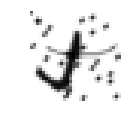

label is "J"


In [6]:
sample = random.randint(0, train_X.shape[0] - 1)
show_img(train_X[sample])
print('label is "{0}"'.format(one_hot_to_label(train_y[sample])))

### Load tf and keras

In [7]:
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


### A super simple model

In [8]:
m1 = Sequential()

m1.add(Flatten(input_shape=(30, 30)))
m1.add(Dense(26))
m1.add(Activation('softmax'))

m1.compile(loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

m1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 26)                23426     
_________________________________________________________________
activation_1 (Activation)    (None, 26)                0         
Total params: 23,426
Trainable params: 23,426
Non-trainable params: 0
_________________________________________________________________


In [9]:
m1.fit(train_X, train_y,
       validation_data=(validate_X, validate_y),
       epochs=10,
       batch_size=64,
       verbose=1)

Train on 100000 samples, validate on 20000 samples
Epoch 1/10
100000/100000 [==============================] - 5s - loss: 2.3360 - acc: 0.3918 - val_loss: 1.7102 - val_acc: 0.6053
Epoch 2/10
100000/100000 [==============================] - 4s - loss: 1.5007 - acc: 0.6260 - val_loss: 1.3033 - val_acc: 0.6715
Epoch 3/10
100000/100000 [==============================] - 4s - loss: 1.2141 - acc: 0.6875 - val_loss: 1.1514 - val_acc: 0.6945
Epoch 4/10
100000/100000 [==============================] - 4s - loss: 1.0658 - acc: 0.7203 - val_loss: 0.9989 - val_acc: 0.7370
Epoch 5/10
100000/100000 [==============================] - 4s - loss: 0.9738 - acc: 0.7394 - val_loss: 0.9495 - val_acc: 0.7405
Epoch 6/10
100000/100000 [==============================] - 4s - loss: 0.9094 - acc: 0.7536 - val_loss: 0.8968 - val_acc: 0.7514
Epoch 7/10
100000/100000 [==============================] - 4s - loss: 0.8628 - acc: 0.7628 - val_loss: 0.8397 - val_acc: 0.7658
Epoch 8/10
100000/100000 [====================

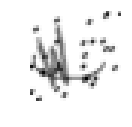

truth: W, h: W


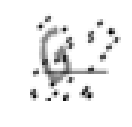

truth: G, h: G


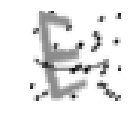

truth: E, h: E


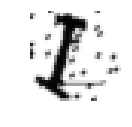

truth: I, h: I


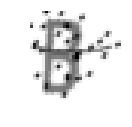

truth: B, h: B


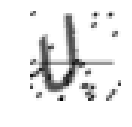

truth: U, h: U


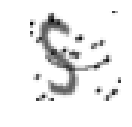

truth: S, h: S


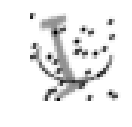

truth: I, h: I


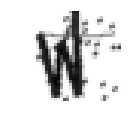

truth: W, h: W


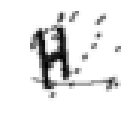

truth: H, h: H


In [10]:
m1_h = m1.predict(test_X)
showcase(test_X, test_y, m1_h, case_num=10)

### Then let's build a MLP model

In [11]:
mk = Sequential()

mk.add(Flatten(input_shape=(30, 30)))
mk.add(Dense(900))
mk.add(BatchNormalization())
mk.add(Dropout(0.5))
mk.add(Activation('relu'))
mk.add(Dense(200))
mk.add(BatchNormalization())
mk.add(Dropout(0.5))
mk.add(Activation('relu'))
mk.add(Dense(26))
mk.add(Activation('softmax'))

mk.compile(loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

mk.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 900)               810900    
_________________________________________________________________
batch_normalization_1 (Batch (None, 900)               3600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 900)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 900)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               180200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
__________

In [12]:
mk.fit(train_X, train_y,
       validation_data=(validate_X, validate_y),
       epochs=10,
       batch_size=64,
       verbose=1)

Train on 100000 samples, validate on 20000 samples
Epoch 1/10
100000/100000 [==============================] - 42s - loss: 0.8467 - acc: 0.7435 - val_loss: 1.7333 - val_acc: 0.5562
Epoch 2/10
100000/100000 [==============================] - 38s - loss: 0.4434 - acc: 0.8627 - val_loss: 0.8071 - val_acc: 0.7629
Epoch 3/10
100000/100000 [==============================] - 39s - loss: 0.3605 - acc: 0.8872 - val_loss: 0.6394 - val_acc: 0.8087
Epoch 4/10
100000/100000 [==============================] - 40s - loss: 0.3150 - acc: 0.9018 - val_loss: 0.7241 - val_acc: 0.8065
Epoch 5/10
100000/100000 [==============================] - 35s - loss: 0.2828 - acc: 0.9110 - val_loss: 0.9845 - val_acc: 0.7322
Epoch 6/10
100000/100000 [==============================] - 36s - loss: 0.2553 - acc: 0.9191 - val_loss: 0.4195 - val_acc: 0.8761
Epoch 7/10
100000/100000 [==============================] - 43s - loss: 0.2365 - acc: 0.9250 - val_loss: 0.6285 - val_acc: 0.8276
Epoch 8/10
100000/100000 [=============

In [21]:
mk_h = mk.predict(test_X)

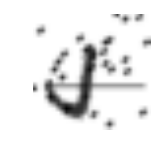

truth: J, h: J


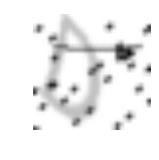

truth: D, h: O


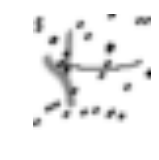

truth: Y, h: Y


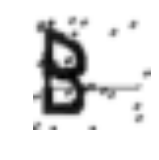

truth: B, h: B


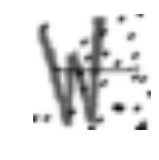

truth: W, h: W


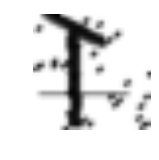

truth: T, h: T


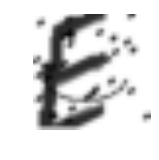

truth: E, h: E


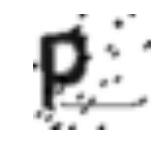

truth: P, h: P


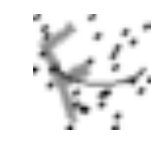

truth: F, h: F


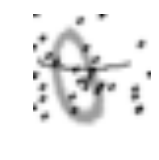

truth: O, h: O


In [22]:
showcase(test_X, test_y, mk_h, case_num=10)

### Here comes a Convolutional Model

In [23]:
mc = Sequential()

mc.add(Convolution2D(64, kernel_size=3, strides=(1, 1), padding='valid', input_shape=(30, 30, 1)))
mc.add(BatchNormalization())
mc.add(Dropout(0.5))
mc.add(Activation('relu'))
mc.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
mc.add(Flatten())
mc.add(Dense(200))
mc.add(BatchNormalization())
mc.add(Dropout(0.5))
mc.add(Activation('relu'))
mc.add(Dense(26))
mc.add(Activation('softmax'))

mc.compile(loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

mc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               2509000   
__________

In [27]:
mc.fit(train_X.reshape((train_X.shape[0], 30, 30, 1)), train_y,
       validation_data=(validate_X.reshape((validate_X.shape[0], 30, 30, 1)), validate_y),
       epochs=10,
       batch_size=64,
       verbose=1)

Train on 100000 samples, validate on 20000 samples
Epoch 1/10
100000/100000 [==============================] - 21s - loss: 0.0430 - acc: 0.9855 - val_loss: 0.1608 - val_acc: 0.9539
Epoch 2/10
100000/100000 [==============================] - 21s - loss: 0.0432 - acc: 0.9851 - val_loss: 0.0794 - val_acc: 0.9743
Epoch 3/10
100000/100000 [==============================] - 21s - loss: 0.0400 - acc: 0.9860 - val_loss: 0.1572 - val_acc: 0.9523
Epoch 4/10
100000/100000 [==============================] - 21s - loss: 0.0397 - acc: 0.9866 - val_loss: 0.1263 - val_acc: 0.9625
Epoch 5/10
100000/100000 [==============================] - 21s - loss: 0.0367 - acc: 0.9876 - val_loss: 0.1601 - val_acc: 0.9492
Epoch 6/10
100000/100000 [==============================] - 21s - loss: 0.0354 - acc: 0.9877 - val_loss: 0.1086 - val_acc: 0.9647
Epoch 7/10
100000/100000 [==============================] - 21s - loss: 0.0350 - acc: 0.9878 - val_loss: 0.1827 - val_acc: 0.9436
Epoch 8/10
100000/100000 [=============

In [28]:
mc_h = mc.predict(test_X.reshape((test_X.shape[0], 30, 30, 1)))

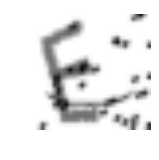

truth: E, h: E


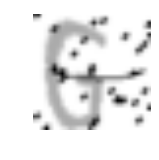

truth: G, h: O


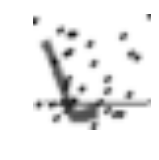

truth: L, h: L


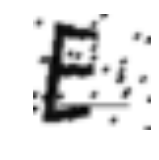

truth: E, h: E


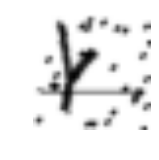

truth: Y, h: Y


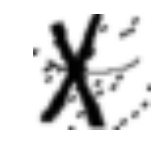

truth: X, h: X


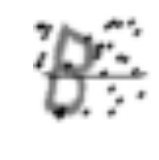

truth: B, h: B


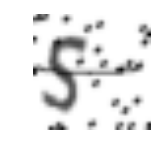

truth: S, h: S


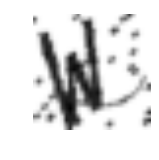

truth: W, h: W


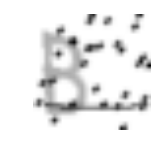

truth: B, h: B


In [29]:
showcase(test_X, test_y, mc_h, case_num=10)

### Maybe we can essemble these 3 models together, let's try

In [30]:
feature_1 = m1.predict(train_X)
feature_2 = mk.predict(train_X)
feature_3 = mc.predict(train_X.reshape(train_X.shape[0], 30, 30, 1))

In [31]:
feature_X = np.ndarray((train_X.shape[0], corpus_len*3), dtype=np.float32)
feature_X.shape

(100000, 78)

In [32]:
def combine_feature(X):
    f1 = m1.predict(X)
    f2 = mk.predict(X)
    f3 = mc.predict(X.reshape(X.shape[0], X.shape[1], X.shape[2], 1))
    comp = np.ndarray((X.shape[0], corpus_len*3), dtype=np.float32)
    comp[:, 0:corpus_len] = f1
    comp[:,corpus_len:corpus_len*2] = f2
    comp[:,corpus_len*2:corpus_len*3] = f3
    return comp

feature_X = combine_feature(train_X)

print(feature_X[0])

[  6.04931156e-05   4.84596975e-02   1.21363475e-04   1.25709241e-02
   5.73609164e-03   1.35622593e-02   1.00347132e-03   7.82430172e-03
   6.66737033e-04   3.37783081e-06   1.66469999e-02   7.33055504e-06
   7.88990688e-03   2.70510488e-03   1.52248016e-03   3.43203805e-02
   1.16066402e-03   8.32416952e-01   2.83944421e-03   2.08715894e-04
   9.40272410e-04   6.63124432e-04   1.61644164e-03   6.21790008e-04
   1.69084372e-03   4.74071177e-03   1.12614407e-15   1.55303215e-10
   1.87367141e-18   1.19580845e-10   8.16576157e-17   4.15233776e-12
   4.07997092e-19   6.50208308e-14   5.86672383e-16   1.89938748e-22
   7.07174255e-14   1.72569429e-23   7.47830790e-12   1.23687573e-13
   1.84746797e-14   2.83114005e-05   3.37923023e-11   9.99971628e-01
   1.52141262e-20   1.08659462e-14   2.51168973e-19   1.29516140e-14
   4.71609350e-17   8.15007756e-17   4.69944302e-18   2.16893340e-14
   6.80057052e-11   1.50801149e-08   4.04071856e-18   3.20323462e-10
   4.65609369e-14   1.91896490e-07

In [33]:
me = Sequential()

me.add(Dense(26, input_shape=(78,)))
me.add(Activation('softmax'))

me.compile(loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

me.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 26)                2054      
_________________________________________________________________
activation_8 (Activation)    (None, 26)                0         
Total params: 2,054
Trainable params: 2,054
Non-trainable params: 0
_________________________________________________________________


In [34]:
me.fit(feature_X, train_y,
       validation_data=(combine_feature(validate_X), validate_y),
       epochs=20,
       batch_size=50,
       verbose=1)

Train on 100000 samples, validate on 20000 samples
Epoch 1/20
100000/100000 [==============================] - 5s - loss: 1.0900 - acc: 0.9282 - val_loss: 0.3101 - val_acc: 0.9662
Epoch 2/20
100000/100000 [==============================] - 5s - loss: 0.1569 - acc: 0.9855 - val_loss: 0.1544 - val_acc: 0.9697
Epoch 3/20
100000/100000 [==============================] - 5s - loss: 0.0772 - acc: 0.9878 - val_loss: 0.1159 - val_acc: 0.9720
Epoch 4/20
100000/100000 [==============================] - 5s - loss: 0.0519 - acc: 0.9892 - val_loss: 0.1005 - val_acc: 0.9736
Epoch 5/20
100000/100000 [==============================] - 5s - loss: 0.0407 - acc: 0.9900 - val_loss: 0.0932 - val_acc: 0.9744
Epoch 6/20
100000/100000 [==============================] - 5s - loss: 0.0349 - acc: 0.9905 - val_loss: 0.0892 - val_acc: 0.9755
Epoch 7/20
100000/100000 [==============================] - 5s - loss: 0.0314 - acc: 0.9910 - val_loss: 0.0868 - val_acc: 0.9757
Epoch 8/20
100000/100000 [====================

In [35]:
me_h = me.predict(combine_feature(test_X))

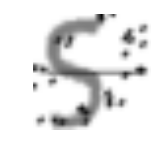

truth: S, h: S


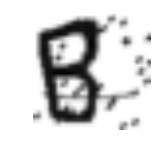

truth: B, h: B


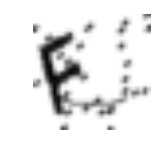

truth: F, h: F


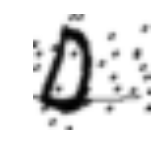

truth: D, h: D


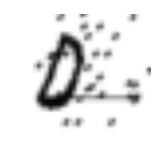

truth: D, h: D


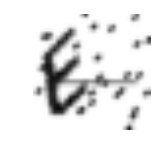

truth: E, h: E


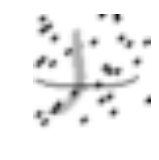

truth: J, h: J


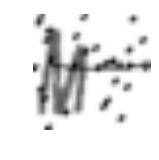

truth: M, h: M


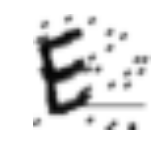

truth: E, h: E


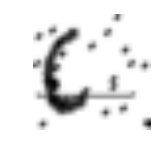

truth: C, h: C


In [36]:
showcase(test_X, test_y, me_h, case_num=10)

### Let's ave all these models to files

In [88]:
m1.save('./m1.h5')
mk.save('./mk.h5')
mc.save('./mc.h5')
me.save('./me.h5')